[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
# Classification - MLP

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaelwilliams/.mi

## Dataset

MNIST is a handwrriten digit database with a training set of 60,000 examples and a test se of 10,000 examples. The images are all 28x28 and greyscale.

It is available [here](http://yann.lecun.com/exdb/mnist/), but is included in Keras and will automatically download.

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


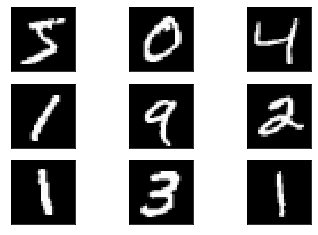

In [3]:
fig, axs = plt.subplots(3,3)
axs = axs.ravel()
for i in range(len(axs)):
    axs[i].imshow(x_train[i].reshape(28,28), cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

Here, the 'x' arrays are the images and the 'y' arrays are the labels

### General parameters

We need to define some general parameters for networks we're going to use

In [4]:
batch_size = 128    # number of images passed each iteration
num_classes = 10    # digits 0 to 9
epochs = 20         # number of full passes of the dataset

## MLP

This example uses a simple deep neural net (more than 1 layer)

For an MLP the data needs to be parsed as 1D array, rather than a 2D image. 

So, the data is reshaped according to the number of samples (60,000 or 10,000) and the size of the image 784 (28x28).

The data is then normalized (0,255) to (0,1)

In [5]:
# reshape data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize data
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


As is the content of the labels vectors looks like this:
```
array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)
```
The NN expects them labels as binary class matrix instead

In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Now the label for each image looks like this:
```
array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)
```


### The Model

In [7]:
model = Sequential()    # define the type of keras model
# add first layer with dropout and relu activation
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
# add another layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
# add the output layer with softmax actiavtion for classication
model.add(Dense(num_classes, activation='softmax'))
# print a summary
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________________________

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

### The Training

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2470 - acc: 0.9267 - val_loss: 0.1107 - val_acc: 0.9655
Epoch 2/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1005 - acc: 0.9684 - val_loss: 0.0782 - val_acc: 0.9754
Epoch 3/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0713 - acc: 0.9776 - val_loss: 0.0784 - val_acc: 0.9759
Epoch 4/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0571 - acc: 0.9818 - val_loss: 0.0710 - val_acc: 0.9798
Epoch 5/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0451 - acc: 0.9855 - val_loss: 0.0694 - val_acc: 0.9806
Epoch 6/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0377 - acc: 0.9875 - val_loss: 0.0709 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0360 - acc: 0.9882 - val_loss: 0.